Il file 'Data.csv' contiene i dati relativi al consumo di energia elettrica della macchina del caffè di Alexide.\
La colonna **Date** rappresenta data e ora della registrazione del sensore. Si noti che le date sono espresse in UTC.
Per convertirle nella timezone locale utilizzare\
`df['Date'] = pd.to_datetime(df['Date'], utc = True).dt.tz_convert('Europe/Berlin')`\
La colonna **Energy** rappresenta il consumo di energia totale, espresso in W*min (Watt minuto), a partire dall'accensione del sensore.
Si noti che il sensore è stato riavviato diverse volte nel periodo di osservazione e, a seguito di ciascun riavvio, il conteggio è ripartito da 0.\
La colonna **Topic** rappresenta il topic del messaggio mqtt ricevuto dal sensore.

Rappresentare i consumi totali in kWh (kiloWatt ora) con una heatmap che abbia sull'asse x le ore del giorno e sull'asse y il giorno della settimana.

# Coffe Machine Heatmap

#### Installo le librerie necessarie

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

#### 1. Dopo aver importato pandas leggo <tt>data.csv</tt> in un dataframe  <tt>df</tt>.

In [229]:
df = pd.read_csv('data.csv',  sep=';')

In [230]:
df['Date'] = pd.to_datetime(df['Date'], utc = True).dt.tz_convert('Europe/Berlin')

In [231]:
df = df.sort_values(['Date'])

#### 2. Exploring the dataframe

In [232]:
# Verifico che la data sia stata convertita nel tipo corretto (datetime64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54794 entries, 54793 to 50732
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype                        
---  ------  --------------  -----                        
 0   Energy  54794 non-null  int64                        
 1   Date    54794 non-null  datetime64[ns, Europe/Berlin]
 2   Topic   54794 non-null  object                       
dtypes: datetime64[ns, Europe/Berlin](1), int64(1), object(1)
memory usage: 1.7+ MB


In [233]:
#df.set_index('Date', inplace=True)
#df

Text(0, 0.5, 'Energy')

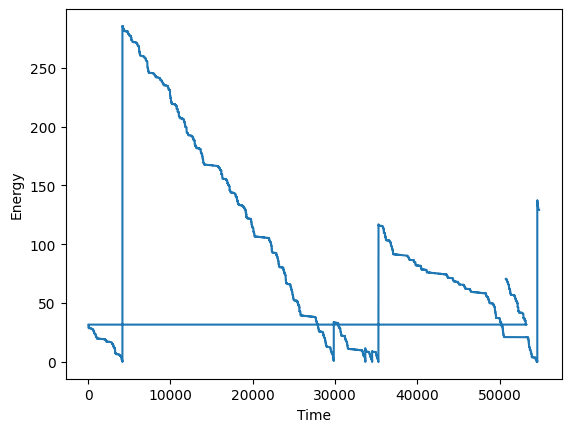

In [234]:
df['Energy'] = df['Energy'] / 1000 
plot = df['Energy'].plot()
plot.set_xlabel("Time")
plot.set_ylabel("Energy")

In [235]:
df['DeltaEnergy'] = df['Energy'].diff()

<AxesSubplot: >

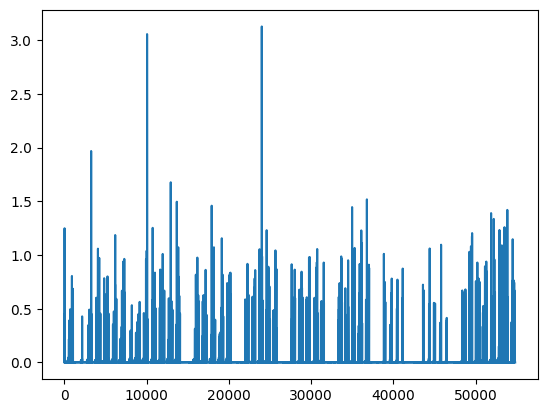

In [236]:
df = df[df['DeltaEnergy'] >= 0]
df['DeltaEnergy'].plot()

In [237]:
df

,Energy,Date,Topic,DeltaEnergy
54792,129.200,2022-08-01 00:14:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000
54791,129.200,2022-08-01 00:19:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000
54790,129.200,2022-08-01 00:24:20+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000
54789,129.200,2022-08-01 00:29:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000
54788,129.200,2022-08-01 00:34:08+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.000
...,...,...,...,...
50728,70.544,2022-10-06 18:39:00+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.002
50729,70.546,2022-10-06 18:40:01+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.002
50730,70.548,2022-10-06 18:41:24+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.002
50731,70.559,2022-10-06 18:42:01+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy,0.011


<AxesSubplot: >

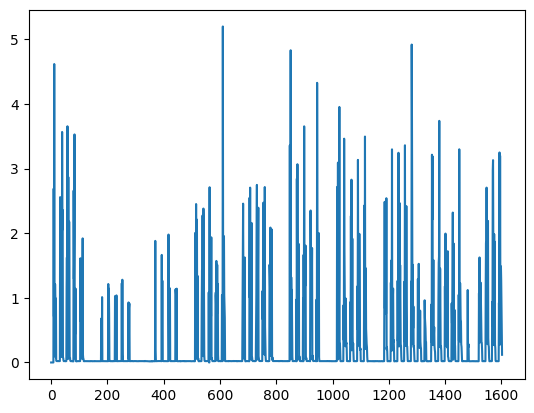

In [238]:
df = df.resample('H', on='Date').agg({'DeltaEnergy': 'sum'}).reset_index()



df['DeltaEnergy'].plot()

In [239]:
df

,Date,DeltaEnergy
0,2022-08-01 00:00:00+02:00,0.000
1,2022-08-01 01:00:00+02:00,0.000
2,2022-08-01 02:00:00+02:00,0.000
3,2022-08-01 03:00:00+02:00,0.000
4,2022-08-01 04:00:00+02:00,0.000
...,...,...
1598,2022-10-06 14:00:00+02:00,1.488
1599,2022-10-06 15:00:00+02:00,1.264
1600,2022-10-06 16:00:00+02:00,0.847
1601,2022-10-06 17:00:00+02:00,0.298


In [240]:


df["Hour"] = df["Date"].dt.hour
df["Weekday"] = df["Date"].dt.weekday

df = df.drop(columns=['Date'])


In [241]:
df = df.groupby(['Weekday', 'Hour']).mean()
df

DeltaEnergy
Weekday Hour             
0       0        0.018700
        1        0.018400
        2        0.018100
        3        0.018400
        4        0.018200
...                   ...
6       19       0.019778
        20       0.020222
        21       0.020222
        22       0.020556
        23       0.020778

[168 rows x 1 columns]

In [242]:
df = df.unstack()

In [243]:
df.columns = df.columns.droplevel(0)
df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,0.018700,0.018400,0.018100,0.018400,0.018200,0.018700,0.0184,0.105900,1.199900,1.258900,...,1.009500,0.740300,0.884100,0.254400,0.118500,0.076100,0.034900,0.020800,0.020600,0.021200
1,0.020700,0.021300,0.020700,0.021100,0.020800,0.020600,0.0212,0.412500,0.686400,1.496200,...,0.801700,1.071700,0.922700,0.385400,0.120100,0.055600,0.027700,0.020800,0.020800,0.021400
2,0.021200,0.020900,0.020700,0.020800,0.020400,0.021000,0.0212,0.657500,0.486400,1.317200,...,1.073600,0.626100,1.197700,0.640600,0.106700,0.066200,0.032800,0.021300,0.021000,0.021000
3,0.021200,0.021100,0.020900,0.020900,0.020800,0.020800,0.0214,0.431600,0.688900,1.588700,...,1.043600,1.105100,0.426500,0.214500,0.087500,0.069444,0.023667,0.021556,0.021444,0.021222
4,0.021222,0.021000,0.020778,0.020778,0.020778,0.021222,0.0210,0.376556,0.666556,1.561222,...,0.927222,0.828667,0.690444,0.192222,0.092111,0.047222,0.020444,0.021444,0.021111,0.021000
5,0.021222,0.021000,0.021000,0.021111,0.020556,0.020778,0.0210,0.161889,0.052778,0.053444,...,0.052667,0.107667,0.176778,0.073778,0.066556,0.049333,0.021000,0.020444,0.020667,0.020556
6,0.021000,0.021111,0.020556,0.020778,0.020667,0.021111,0.0210,0.125778,0.095444,0.084333,...,0.020556,0.020111,0.020333,0.020222,0.019667,0.019778,0.020222,0.020222,0.020556,0.020778


<AxesSubplot: xlabel='Hour', ylabel='Weekday'>

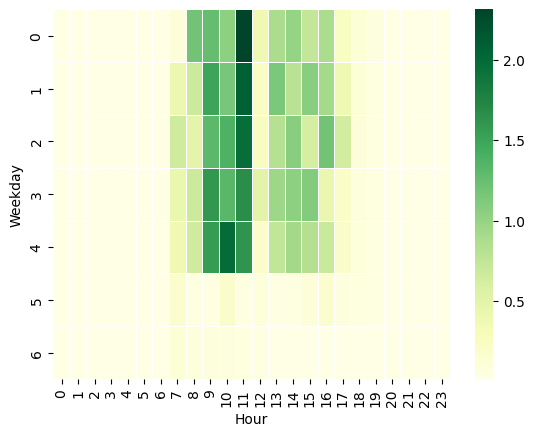

In [245]:
import seaborn as sns
sns.heatmap(df, cmap="YlGn", linewidths=.5)